# ТВиМС. Лабораторная работа №4

## Вариант 25
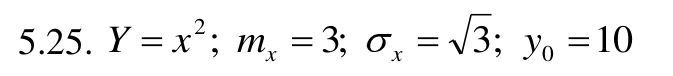

In [65]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

In [66]:
# globals
sigma = 1.73205
Mx = 3.0

PRECISION = 5

a = Mx - round(1.73205 * sigma, PRECISION)
b = Mx + round(1.73205 * sigma, PRECISION)

N = 200
INTERVALS = int(np.sqrt(N)) if N <= 100 else int(3 * np.log(N))
alpha = 0.01

alphas = [0.01, 0.05, 0.09, 0.2, 0.4, 0.5]

# interval for aplha=0.01
intervls = []
t_intervls = []
vars_ams = []

In [67]:
# getting eps
def eps():
    return np.random.random_sample()

# getting x with eps
def x_func():
    return eps() * (b - a) + a

# getting y with x
def y_func(x):
    return x * x

In [68]:
# generating n variants of y
def get_varseries(n: int):
    ans = []
    for i in range(0, n):
        ans.append(y_func(x_func()))
    ans.sort()
    return ans

# do line plot
def make_lines(xs, ys, lbl=""):
    plt.plot(xs, ys, label=lbl)
    plt.scatter(xs, ys)
    plt.legend()
    plt.show()
    
# theoretical distribution density
def theory_density(y):
    if y > 0 and y <= 36:
        return 1.0 / (12 * np.sqrt(y))
    return 0

def theory_distribution(y):
    if y <= 0:
        return 0
    if y <= 36.0:
        return 1/6.0 * np.sqrt(y)
    return 1

def comp(xs, ys, zs, lbl1="", lbl2=""):
    plt.plot(xs, ys, label=lbl1, color="red")
    plt.plot(xs, zs, label=lbl2, color="blue")
    plt.legend()
    plt.show()

## Теоретическая плотность распределения
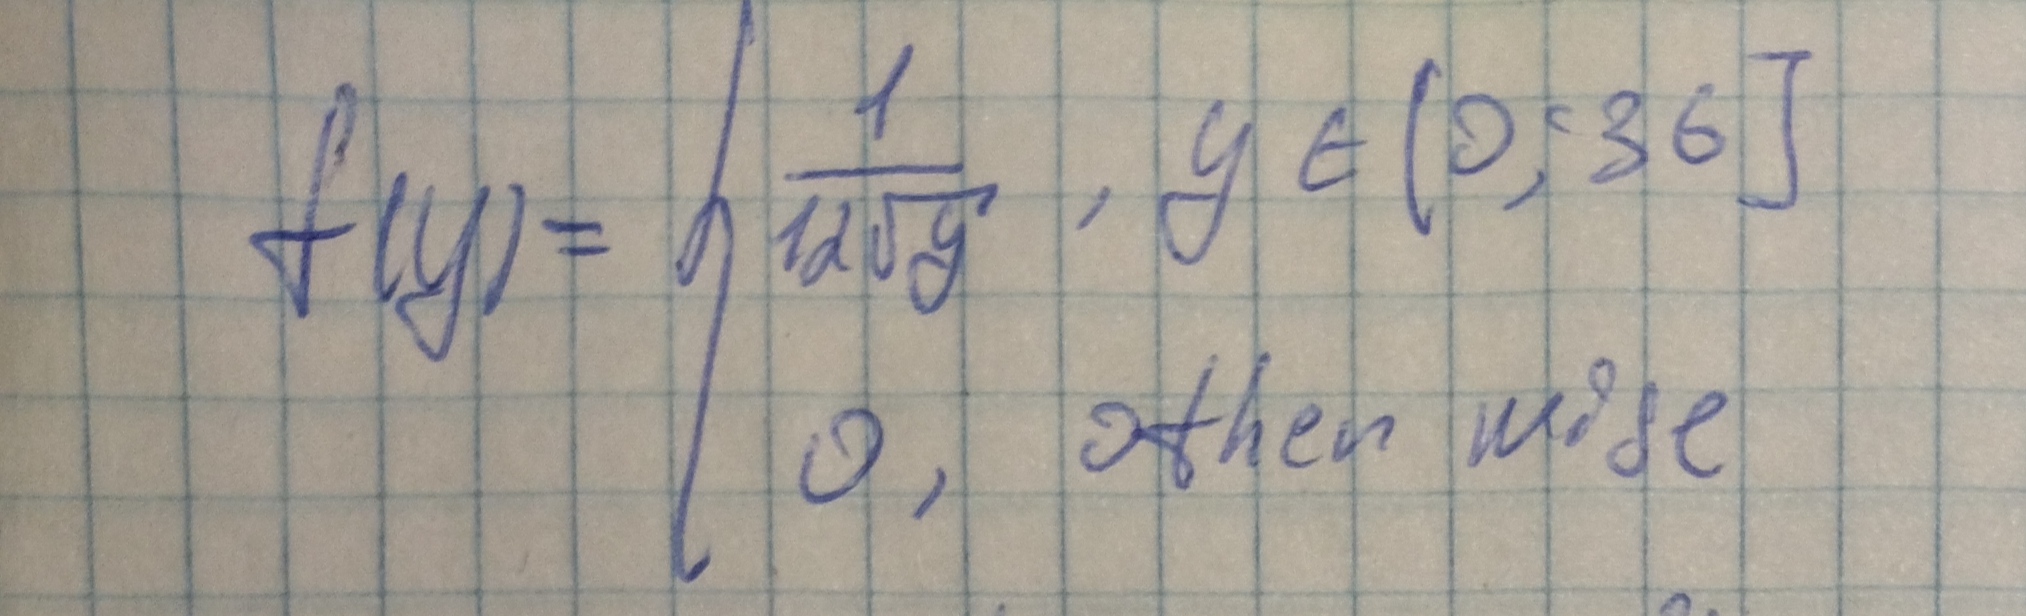

## Находжение теоретического МО
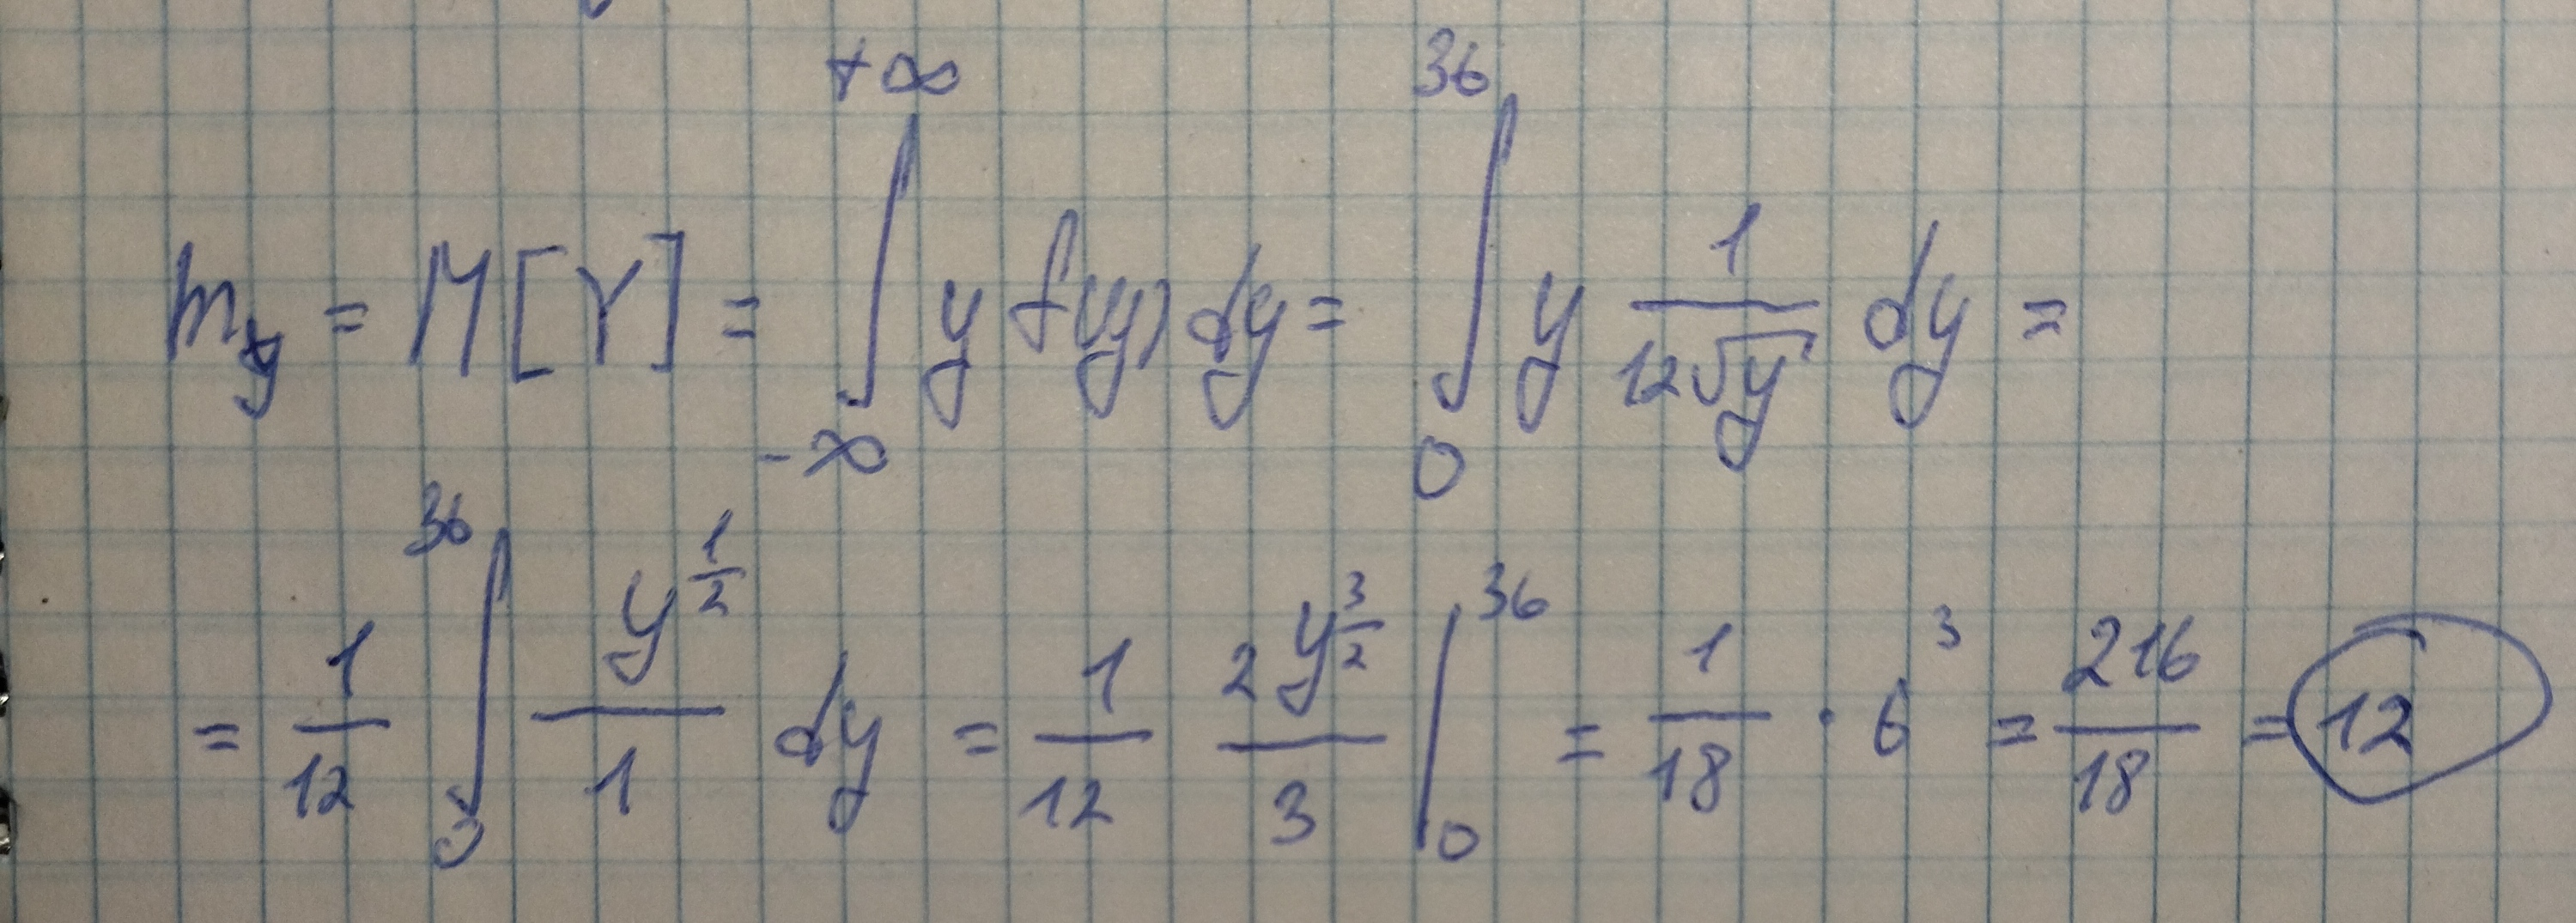

In [69]:
E_VAL = 12.0

## Нахождение теоретического значения дисперсии
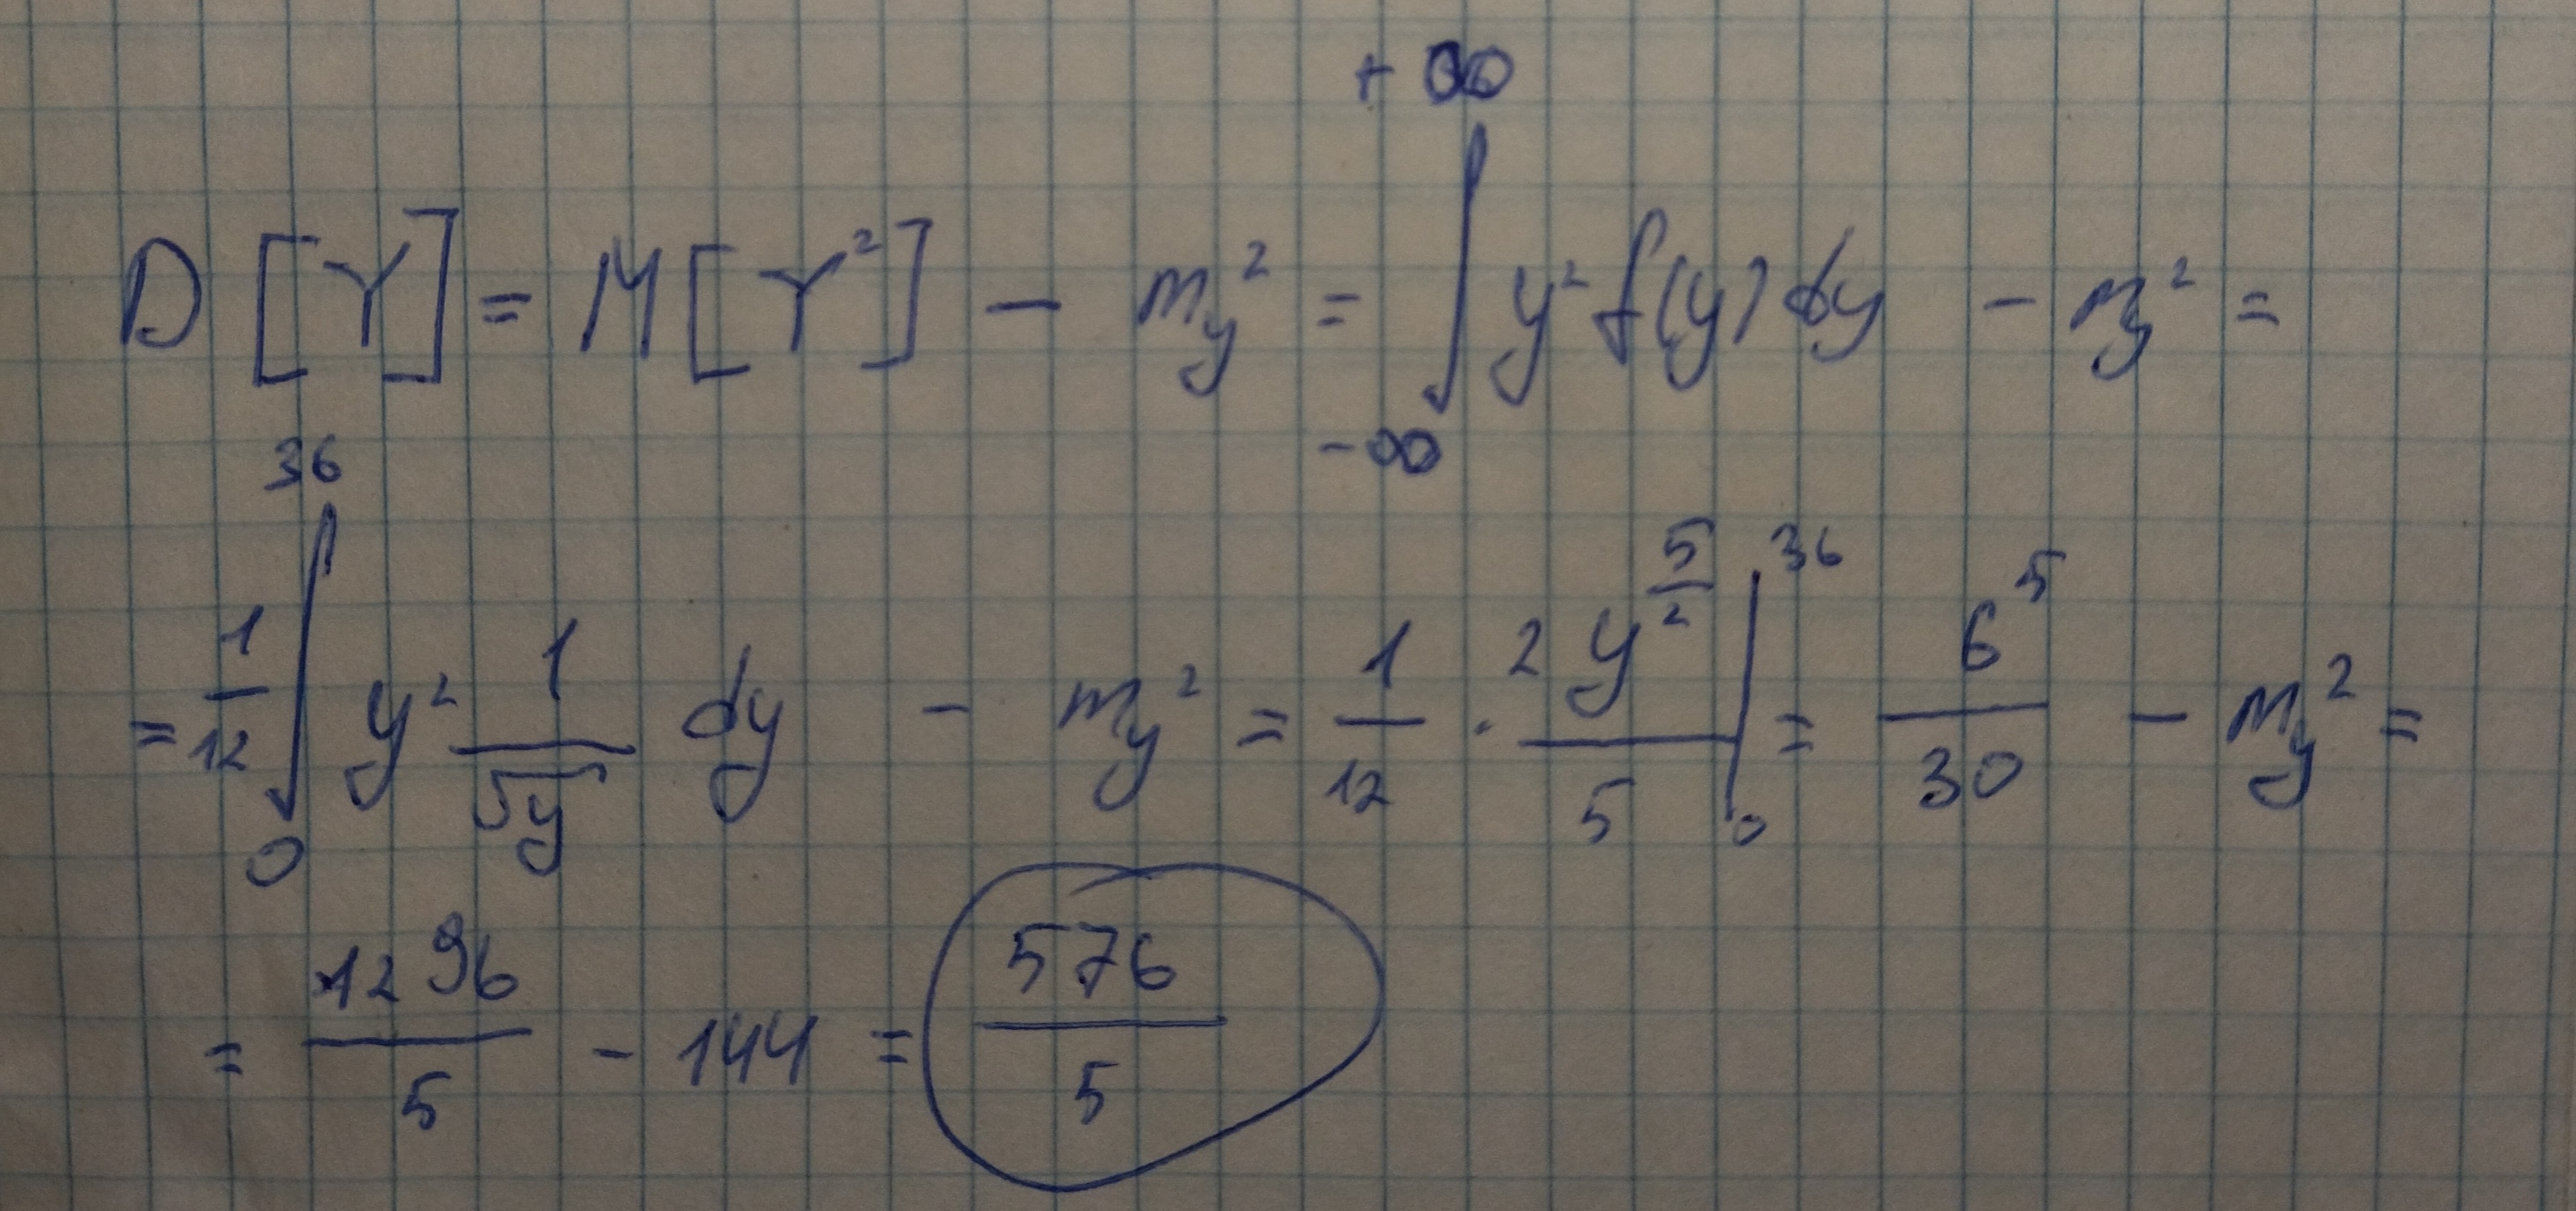

In [70]:
D_VAL = 576 / 5.0 # 115....

## Доверительный интервал для МО

In [71]:
# do all with n
def esen_int(n):
    print("#" * 50)
    ser = get_varseries(n)
    
    print(f"Реальное МО - {E_VAL}")
    
    # точечная оценка МО
    me = 0
    for i in ser: me += i
    me /= n
    print(f"Точечная оценка МО при выборке из {n} элементов - {me}.")
    
    # точечная несмещенная оценка дисперсии
    Sq = 0
    for i in ser:
        Sq += pow(i - me, 2)
    Sq *= 1 / (n - 1)
    print(f"Точечная несмещенноая оценка дисперсии при выборке из {n} элементов - {Sq}.")
    
    # доверительный интервал при разных уровнях значимости
    print("Доверительные интервалы при разных уровнях значимости:\n")
    fracs = []
    gammas = []
    for al in alphas:
        gamma = 1 - al
        frac = (Sq * stats.t.ppf(gamma, n - 1)) / np.sqrt(n - 1)
        fracs.append(abs((me + frac) - (me - frac)))
        print(
            f"Интервал при уровне значимости {round(gamma, PRECISION)} (alpha={al}): " \
            f"{round(me - frac, PRECISION)} <= Mx <= " \
              f"{round(me + frac, PRECISION)}")
        gammas.append(gamma)
    
    # add interval lenght
    intervls.append(fracs[0])
    vars_ams.append(n)
    
    # график d(g) 
    print("График зависимости длинны интервала от уровня значимости.")
    make_lines(gammas, fracs, "d(g)")
    
    print("Доверительные интервалы при разных уровнях значимости (при теоретической дисперсии)")
    dfracs = []
    for al in alphas:
        gamma = 1 - al
        frac = (D_VAL * stats.t.ppf(gamma, n - 1)) / np.sqrt(n - 1)
        dfracs.append(abs((me + frac) - (me - frac)))
        print(
            f"Интервал при уровне значимости {round(gamma, PRECISION)} (alpha={al}): " \
            f"{round(me - frac, PRECISION)} <= Mx <= " \
              f"{round(me + frac, PRECISION)}")
    print("График зависимости длинны интервала от уровня значимости (при теоретичекой дисперсии)")
    make_lines(gammas, dfracs, "d(g)")
    
    t_intervls.append(dfracs[0])
    
    print("Сравнение доверительных интервалов при разных уровнях значениях с теоретической дисперсией и нет:")
    comp(gammas, dfracs, fracs, "theory dispersion", "empirical dispersion")
    print("#" * 50)

##################################################
Реальное МО - 12.0
Точечная оценка МО при выборке из 20 элементов - 14.680108403683239.
Точечная несмещенноая оценка дисперсии при выборке из 20 элементов - 107.4709232593294.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): -47.93217 <= Mx <= 77.29239
Интервал при уровне значимости 0.95 (alpha=0.05): -27.95256 <= Mx <= 57.31278
Интервал при уровне значимости 0.91 (alpha=0.09): -19.64067 <= Mx <= 49.00089
Интервал при уровне значимости 0.8 (alpha=0.2): -6.54708 <= Mx <= 35.90729
Интервал при уровне значимости 0.6 (alpha=0.4): 8.34554 <= Mx <= 21.01467
Интервал при уровне значимости 0.5 (alpha=0.5): 14.68011 <= Mx <= 14.68011
График зависимости длинны интервала от уровня значимости.


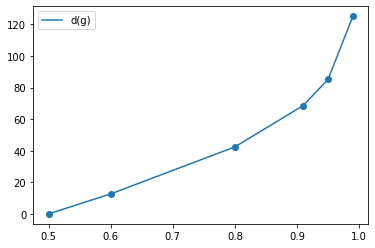

Доверительные интервалы при разных уровнях значимости (при теоретической дисперсии)
Интервал при уровне значимости 0.99 (alpha=0.01): -52.43511 <= Mx <= 81.79533
Интервал при уровне значимости 0.95 (alpha=0.05): -31.01861 <= Mx <= 60.37883
Интервал при уровне значимости 0.91 (alpha=0.09): -22.10895 <= Mx <= 51.46916
Интервал при уровне значимости 0.8 (alpha=0.2): -8.07369 <= Mx <= 37.43391
Интервал при уровне значимости 0.6 (alpha=0.4): 7.88997 <= Mx <= 21.47024
Интервал при уровне значимости 0.5 (alpha=0.5): 14.68011 <= Mx <= 14.68011
График зависимости длинны интервала от уровня значимости (при теоретичекой дисперсии)


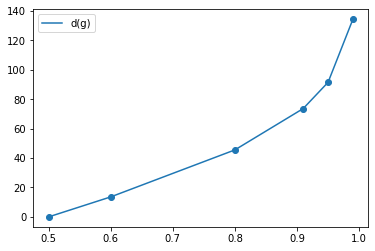

Сравнение доверительных интервалов при разных уровнях значениях с теоретической дисперсией и нет:


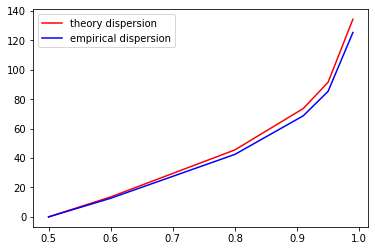

##################################################


In [72]:
intervls = []
vars_ams = []
t_intervls = []
esen_int(20)

##################################################
Реальное МО - 12.0
Точечная оценка МО при выборке из 30 элементов - 14.050220943125257.
Точечная несмещенноая оценка дисперсии при выборке из 30 элементов - 148.88694589470967.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): -54.01879 <= Mx <= 82.11923
Интервал при уровне значимости 0.95 (alpha=0.05): -32.92658 <= Mx <= 61.02703
Интервал при уровне значимости 0.91 (alpha=0.09): -23.93483 <= Mx <= 52.03528
Интервал при уровне значимости 0.8 (alpha=0.2): -9.56615 <= Mx <= 37.66659
Интервал при уровне значимости 0.6 (alpha=0.4): 6.98118 <= Mx <= 21.11926
Интервал при уровне значимости 0.5 (alpha=0.5): 14.05022 <= Mx <= 14.05022
График зависимости длинны интервала от уровня значимости.


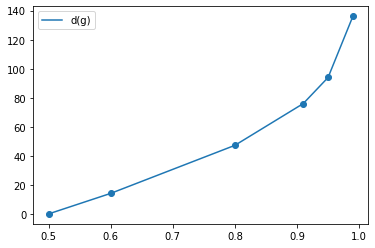

Доверительные интервалы при разных уровнях значимости (при теоретической дисперсии)
Интервал при уровне значимости 0.99 (alpha=0.01): -38.61759 <= Mx <= 66.71804
Интервал при уровне значимости 0.95 (alpha=0.05): -22.29768 <= Mx <= 50.39812
Интервал при уровне значимости 0.91 (alpha=0.09): -15.34039 <= Mx <= 43.44083
Интервал при уровне значимости 0.8 (alpha=0.2): -4.22274 <= Mx <= 32.32318
Интервал при уровне значимости 0.6 (alpha=0.4): 8.58061 <= Mx <= 19.51983
Интервал при уровне значимости 0.5 (alpha=0.5): 14.05022 <= Mx <= 14.05022
График зависимости длинны интервала от уровня значимости (при теоретичекой дисперсии)


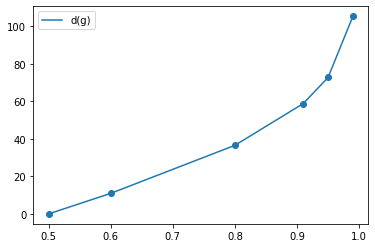

Сравнение доверительных интервалов при разных уровнях значениях с теоретической дисперсией и нет:


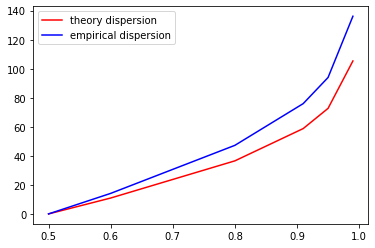

##################################################
##################################################
Реальное МО - 12.0
Точечная оценка МО при выборке из 50 элементов - 9.568438414075507.
Точечная несмещенноая оценка дисперсии при выборке из 50 элементов - 104.94316520990357.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): -26.48541 <= Mx <= 45.62229
Интервал при уровне значимости 0.95 (alpha=0.05): -15.56621 <= Mx <= 34.70309
Интервал при уровне значимости 0.91 (alpha=0.09): -10.82313 <= Mx <= 29.96
Интервал при уровне значимости 0.8 (alpha=0.2): -3.15994 <= Mx <= 22.29682
Интервал при уровне значимости 0.6 (alpha=0.4): 5.7496 <= Mx <= 13.38728
Интервал при уровне значимости 0.5 (alpha=0.5): 9.56844 <= Mx <= 9.56844
График зависимости длинны интервала от уровня значимости.


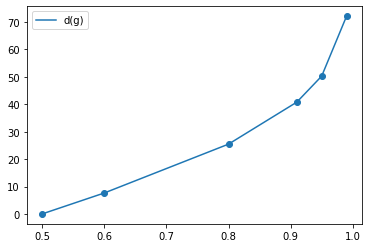

Доверительные интервалы при разных уровнях значимости (при теоретической дисперсии)
Интервал при уровне значимости 0.99 (alpha=0.01): -30.00921 <= Mx <= 49.14609
Интервал при уровне значимости 0.95 (alpha=0.05): -18.0228 <= Mx <= 37.15968
Интервал при уровне значимости 0.91 (alpha=0.09): -12.81614 <= Mx <= 31.95302
Интервал при уровне значимости 0.8 (alpha=0.2): -4.40398 <= Mx <= 23.54086
Интервал при уровне значимости 0.6 (alpha=0.4): 5.37636 <= Mx <= 13.76052
Интервал при уровне значимости 0.5 (alpha=0.5): 9.56844 <= Mx <= 9.56844
График зависимости длинны интервала от уровня значимости (при теоретичекой дисперсии)


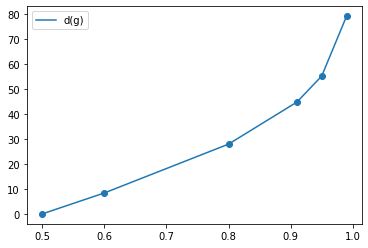

Сравнение доверительных интервалов при разных уровнях значениях с теоретической дисперсией и нет:


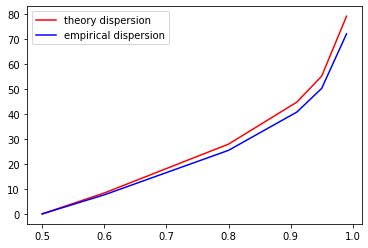

##################################################
##################################################
Реальное МО - 12.0
Точечная оценка МО при выборке из 70 элементов - 13.454501267977736.
Точечная несмещенноая оценка дисперсии при выборке из 70 элементов - 112.74444346125614.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): -18.87076 <= Mx <= 45.77976
Интервал при уровне значимости 0.95 (alpha=0.05): -9.17465 <= Mx <= 36.08366
Интервал при уровне значимости 0.91 (alpha=0.09): -4.92973 <= Mx <= 31.83873
Интервал при уровне значимости 0.8 (alpha=0.2): 1.96019 <= Mx <= 24.94881
Интервал при уровне значимости 0.6 (alpha=0.4): 10.00257 <= Mx <= 16.90643
Интервал при уровне значимости 0.5 (alpha=0.5): 13.4545 <= Mx <= 13.4545
График зависимости длинны интервала от уровня значимости.


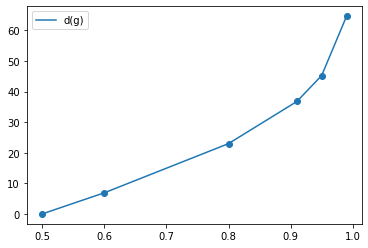

Доверительные интервалы при разных уровнях значимости (при теоретической дисперсии)
Интервал при уровне значимости 0.99 (alpha=0.01): -19.5748 <= Mx <= 46.4838
Интервал при уровне значимости 0.95 (alpha=0.05): -9.66751 <= Mx <= 36.57652
Интервал при уровне значимости 0.91 (alpha=0.09): -5.33013 <= Mx <= 32.23914
Интервал при уровне значимости 0.8 (alpha=0.2): 1.70984 <= Mx <= 25.19916
Интервал при уровне значимости 0.6 (alpha=0.4): 9.92739 <= Mx <= 16.98161
Интервал при уровне значимости 0.5 (alpha=0.5): 13.4545 <= Mx <= 13.4545
График зависимости длинны интервала от уровня значимости (при теоретичекой дисперсии)


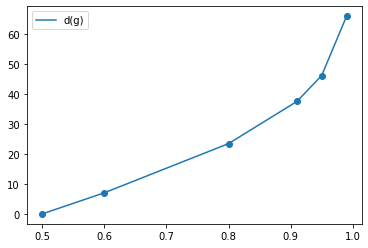

Сравнение доверительных интервалов при разных уровнях значениях с теоретической дисперсией и нет:


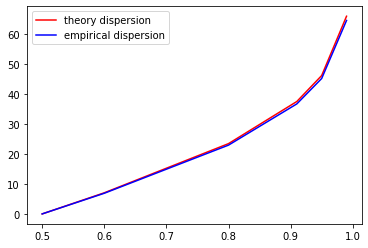

##################################################
##################################################
Реальное МО - 12.0
Точечная оценка МО при выборке из 100 элементов - 14.020336198668197.
Точечная несмещенноая оценка дисперсии при выборке из 100 элементов - 126.48807307355915.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): -16.03979 <= Mx <= 44.08046
Интервал при уровне значимости 0.95 (alpha=0.05): -7.08744 <= Mx <= 35.12811
Интервал при уровне значимости 0.91 (alpha=0.09): -3.14534 <= Mx <= 31.18601
Интервал при уровне значимости 0.8 (alpha=0.2): 3.27485 <= Mx <= 24.76582
Интервал при уровне значимости 0.6 (alpha=0.4): 10.79098 <= Mx <= 17.24969
Интервал при уровне значимости 0.5 (alpha=0.5): 14.02034 <= Mx <= 14.02034
График зависимости длинны интервала от уровня значимости.


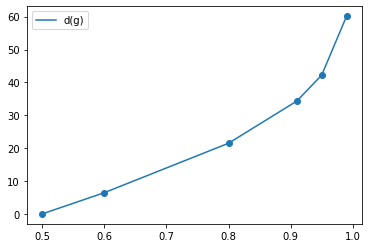

Доверительные интервалы при разных уровнях значимости (при теоретической дисперсии)
Интервал при уровне значимости 0.99 (alpha=0.01): -13.35715 <= Mx <= 41.39783
Интервал при уровне значимости 0.95 (alpha=0.05): -5.20373 <= Mx <= 33.2444
Интервал при уровне значимости 0.91 (alpha=0.09): -1.61344 <= Mx <= 29.65411
Интервал при уровне значимости 0.8 (alpha=0.2): 4.2338 <= Mx <= 23.80687
Интервал при уровне значимости 0.6 (alpha=0.4): 11.07918 <= Mx <= 16.96149
Интервал при уровне значимости 0.5 (alpha=0.5): 14.02034 <= Mx <= 14.02034
График зависимости длинны интервала от уровня значимости (при теоретичекой дисперсии)


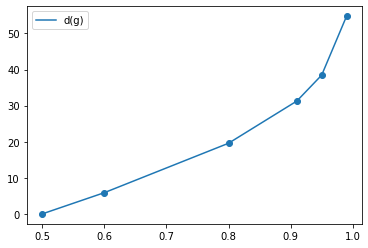

Сравнение доверительных интервалов при разных уровнях значениях с теоретической дисперсией и нет:


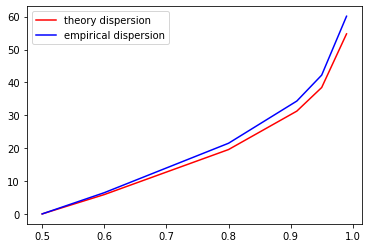

##################################################
##################################################
Реальное МО - 12.0
Точечная оценка МО при выборке из 150 элементов - 10.606118214508095.
Точечная несмещенноая оценка дисперсии при выборке из 150 элементов - 114.59867643245315.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): -11.47171 <= Mx <= 32.68395
Интервал при уровне значимости 0.95 (alpha=0.05): -4.93286 <= Mx <= 26.14509
Интервал при уровне значимости 0.91 (alpha=0.09): -2.04065 <= Mx <= 23.25288
Интервал при уровне значимости 0.8 (alpha=0.2): 2.68202 <= Mx <= 18.53021
Интервал при уровне значимости 0.6 (alpha=0.4): 8.22337 <= Mx <= 12.98887
Интервал при уровне значимости 0.5 (alpha=0.5): 10.60612 <= Mx <= 10.60612
График зависимости длинны интервала от уровня значимости.


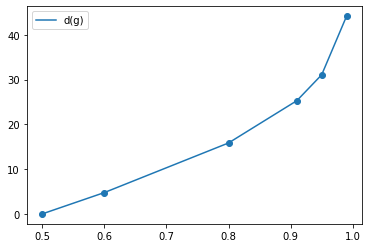

Доверительные интервалы при разных уровнях значимости (при теоретической дисперсии)
Интервал при уровне значимости 0.99 (alpha=0.01): -11.58756 <= Mx <= 32.79979
Интервал при уровне значимости 0.95 (alpha=0.05): -5.01439 <= Mx <= 26.22663
Интервал при уровне значимости 0.91 (alpha=0.09): -2.10701 <= Mx <= 23.31924
Интервал при уровне значимости 0.8 (alpha=0.2): 2.64044 <= Mx <= 18.57179
Интервал при уровне значимости 0.6 (alpha=0.4): 8.21087 <= Mx <= 13.00137
Интервал при уровне значимости 0.5 (alpha=0.5): 10.60612 <= Mx <= 10.60612
График зависимости длинны интервала от уровня значимости (при теоретичекой дисперсии)


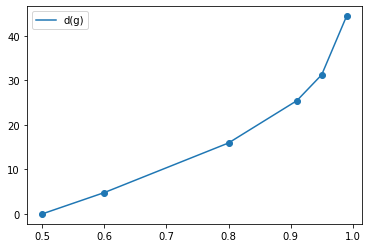

Сравнение доверительных интервалов при разных уровнях значениях с теоретической дисперсией и нет:


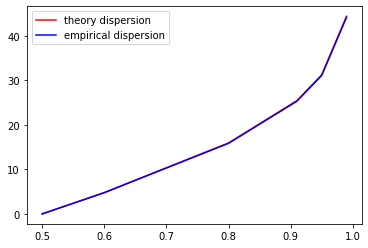

##################################################


In [73]:
esen_int(30)
esen_int(50)
esen_int(70)
esen_int(100)
esen_int(150)

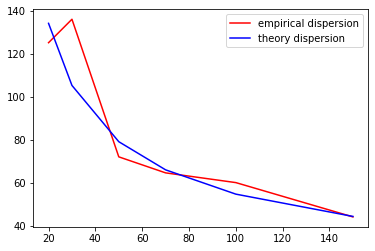

In [74]:
# make_lines(vars_ams, intervls, "d(n), when gamma=0.99")
comp(vars_ams, intervls, t_intervls, "empirical dispersion", "theory dispersion")

## Доверительный интервал для дисперсии

In [75]:
# do all with n
def disp_int(n):
    print("#" * 50)
    ser = get_varseries(n)
    
    # точечная оценка МО
    me = 0
    for i in ser: 
        me += i
    me /= n
    print(f"Точечная оценка МО при выборке из {n} элементов - {me}.")
    
    # точечная несмещенная оценка дисперсии
    Sq = 0
    for i in ser:
        Sq += pow(i - me, 2)
    Sq *= 1 / (n - 1)
    print(f"Точечная несмещенноая оценка дисперсии при выборке из {n} элементов - {Sq}.")
    
    # доверительный интервал при разных уровнях значимости
    print("Доверительные интервалы при разных уровнях значимости:\n")
    fracs = []
    gammas = []
    for al in alphas:
        gamma = 1 - al
        frac1 = n * Sq / stats.chi2.ppf((1 + gamma) / 2.0, n - 1)
        frac2 = n * Sq / stats.chi2.ppf((1 - gamma) / 2.0, n - 1)
        fracs.append(abs(frac2 - frac1))
        print(
            f"Интервал при уровне значимости {round(gamma, PRECISION)} (alpha={al}): " \
            f"{round(frac1, PRECISION)} <= D <= " \
              f"{round(frac2, PRECISION)}")
        gammas.append(gamma)
    
    # add interval lenght
    intervls.append(fracs[0])
    vars_ams.append(n)
    
    # график d(g) 
    print("График зависимости длинны интервала от уровня значимости.")
    make_lines(gammas, fracs, "d(g)")
    
    print("Доверительные интервалы при разных уровнях значимости (при теоретическом МО)")
    Sq = 0
    for i in ser:
        Sq += pow(i - E_VAL, 2)
    Sq *= 1 / n
    print(Sq)
    dfracs = []
    for al in alphas:
        gamma = 1 - al
        frac1 = (n * Sq) / stats.chi2.ppf((1 + gamma) / 2.0, n - 1)
        frac2 = (n * Sq) / stats.chi2.ppf((1 - gamma) / 2.0, n - 1)
        dfracs.append(abs(frac2 - frac1))
        print(
            f"Интервал при уровне значимости {round(gamma, PRECISION)} (alpha={al}): " \
            f"{round(frac1, PRECISION)} <= D <= " \
              f"{round(frac2, PRECISION)}")
    print("График зависимости длинны интервала от уровня значимости (при теоретичеком МО)")
    make_lines(gammas, dfracs, "d(g)")
    
    t_intervls.append(dfracs[0])
    
    print("Сравнение доверительных интервалов при разных уровнях значениях с теоретическим МО и нет:")
    comp(gammas, dfracs, fracs, "theory expected value", "empirical expected value")
    print("#" * 50)

##################################################
Точечная оценка МО при выборке из 20 элементов - 11.616690380044599.
Точечная несмещенноая оценка дисперсии при выборке из 20 элементов - 124.65030689750384.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): 64.61535 <= D <= 364.26308
Интервал при уровне значимости 0.95 (alpha=0.05): 75.88522 <= D <= 279.9081
Интервал при уровне значимости 0.91 (alpha=0.09): 81.55605 <= D <= 251.42569
Интервал при уровне значимости 0.8 (alpha=0.2): 91.64261 <= D <= 213.97523
Интервал при уровне значимости 0.6 (alpha=0.4): 104.30806 <= D <= 181.76176
Интервал при уровне значимости 0.5 (alpha=0.5): 109.73798 <= D <= 171.19947
График зависимости длинны интервала от уровня значимости.


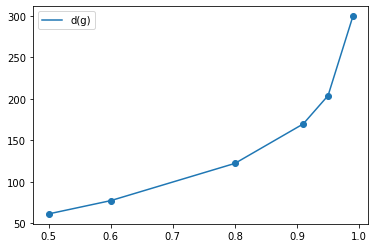

Доверительные интервалы при разных уровнях значимости (при теоретическом МО)
118.56471781737906
Интервал при уровне значимости 0.99 (alpha=0.01): 61.46075 <= D <= 346.47929
Интервал при уровне значимости 0.95 (alpha=0.05): 72.18041 <= D <= 266.24263
Интервал при уровне значимости 0.91 (alpha=0.09): 77.57437 <= D <= 239.15077
Интервал при уровне значимости 0.8 (alpha=0.2): 87.1685 <= D <= 203.52868
Интервал при уровне значимости 0.6 (alpha=0.4): 99.21561 <= D <= 172.88792
Интервал при уровне значимости 0.5 (alpha=0.5): 104.38043 <= D <= 162.84129
График зависимости длинны интервала от уровня значимости (при теоретичеком МО)


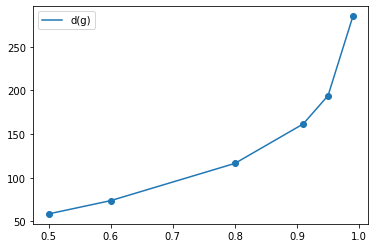

Сравнение доверительных интервалов при разных уровнях значениях с теоретическим МО и нет:


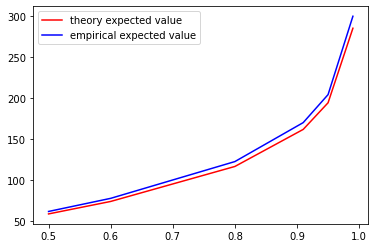

##################################################


In [76]:
intervls = []
vars_ams = []
t_intervls = []

disp_int(20)

##################################################
Точечная оценка МО при выборке из 30 элементов - 12.994065722811351.
Точечная несмещенноая оценка дисперсии при выборке из 30 элементов - 98.83594814211075.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): 56.65508 <= D <= 225.97704
Интервал при уровне значимости 0.95 (alpha=0.05): 64.84974 <= D <= 184.7738
Интервал при уровне значимости 0.91 (alpha=0.09): 68.86745 <= D <= 170.07271
Интервал при уровне значимости 0.8 (alpha=0.2): 75.85752 <= D <= 149.9958
Интервал при уровне значимости 0.6 (alpha=0.4): 84.38054 <= D <= 131.92755
Интервал при уровне значимости 0.5 (alpha=0.5): 87.95605 <= D <= 125.81705
График зависимости длинны интервала от уровня значимости.


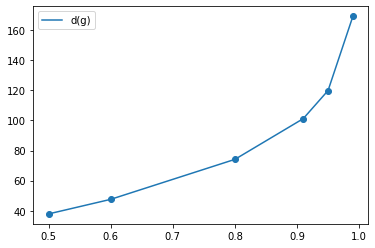

Доверительные интервалы при разных уровнях значимости (при теоретическом МО)
96.52958319864217
Интервал при уровне значимости 0.99 (alpha=0.01): 55.33301 <= D <= 220.70381
Интервал при уровне значимости 0.95 (alpha=0.05): 63.33645 <= D <= 180.46205
Интервал при уровне значимости 0.91 (alpha=0.09): 67.2604 <= D <= 166.10402
Интервал при уровне значимости 0.8 (alpha=0.2): 74.08736 <= D <= 146.4956
Интервал при уровне значимости 0.6 (alpha=0.4): 82.4115 <= D <= 128.84898
Интервал при уровне значимости 0.5 (alpha=0.5): 85.90357 <= D <= 122.88108
График зависимости длинны интервала от уровня значимости (при теоретичеком МО)


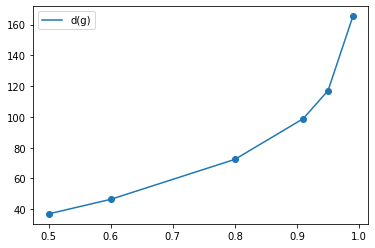

Сравнение доверительных интервалов при разных уровнях значениях с теоретическим МО и нет:


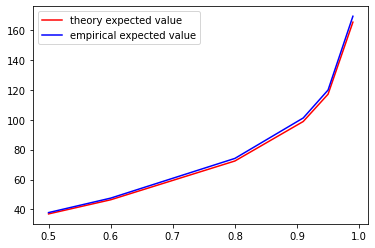

##################################################
##################################################
Точечная оценка МО при выборке из 50 элементов - 11.237095761838583.
Точечная несмещенноая оценка дисперсии при выборке из 50 элементов - 122.06781714018356.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): 78.01784 <= D <= 223.983
Интервал при уровне значимости 0.95 (alpha=0.05): 86.91514 <= D <= 193.42123
Интервал при уровне значимости 0.91 (alpha=0.09): 91.16073 <= D <= 181.96661
Интервал при уровне значимости 0.8 (alpha=0.2): 98.38222 <= D <= 165.77095
Интервал при уровне значимости 0.6 (alpha=0.4): 106.92953 <= D <= 150.57305
Интервал при уровне значимости 0.5 (alpha=0.5): 110.43795 <= D <= 145.28286
График зависимости длинны интервала от уровня значимости.


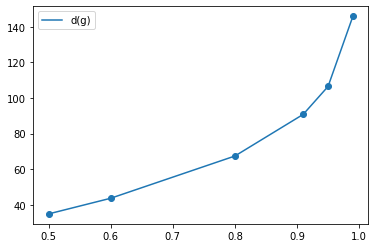

Доверительные интервалы при разных уровнях значимости (при теоретическом МО)
120.20848367398452
Интервал при уровне значимости 0.99 (alpha=0.01): 76.82947 <= D <= 220.57129
Интервал при уровне значимости 0.95 (alpha=0.05): 85.59125 <= D <= 190.47505
Интервал при уровне значимости 0.91 (alpha=0.09): 89.77217 <= D <= 179.1949
Интервал при уровне значимости 0.8 (alpha=0.2): 96.88367 <= D <= 163.24593
Интервал при уровне значимости 0.6 (alpha=0.4): 105.30078 <= D <= 148.27953
Интервал при уровне значимости 0.5 (alpha=0.5): 108.75576 <= D <= 143.06991
График зависимости длинны интервала от уровня значимости (при теоретичеком МО)


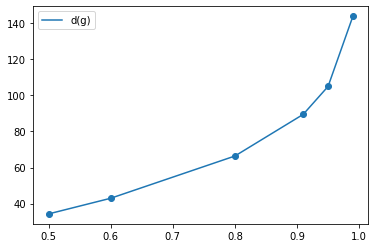

Сравнение доверительных интервалов при разных уровнях значениях с теоретическим МО и нет:


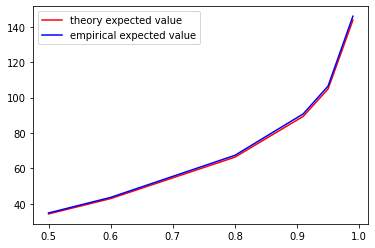

##################################################
##################################################
Точечная оценка МО при выборке из 70 элементов - 13.205498771248621.
Точечная несмещенноая оценка дисперсии при выборке из 70 элементов - 128.9084698878811.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): 87.61092 <= D <= 212.35215
Интервал при уровне значимости 0.95 (alpha=0.05): 96.14247 <= D <= 188.289
Интервал при уровне значимости 0.91 (alpha=0.09): 100.15319 <= D <= 179.04996
Интервал при уровне значимости 0.8 (alpha=0.2): 106.89197 <= D <= 165.75877
Интервал при уровне значимости 0.6 (alpha=0.4): 114.74133 <= D <= 153.02119
Интервал при уровне значимости 0.5 (alpha=0.5): 117.92593 <= D <= 148.5222
График зависимости длинны интервала от уровня значимости.


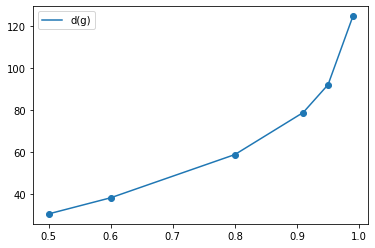

Доверительные интервалы при разных уровнях значимости (при теоретическом МО)
128.52014760553612
Интервал при уровне значимости 0.99 (alpha=0.01): 87.347 <= D <= 211.71247
Интервал при уровне значимости 0.95 (alpha=0.05): 95.85285 <= D <= 187.72181
Интервал при уровне значимости 0.91 (alpha=0.09): 99.85149 <= D <= 178.51059
Интервал при уровне значимости 0.8 (alpha=0.2): 106.56997 <= D <= 165.25944
Интервал при уровне значимости 0.6 (alpha=0.4): 114.39569 <= D <= 152.56023
Интервал при уровне значимости 0.5 (alpha=0.5): 117.57069 <= D <= 148.07479
График зависимости длинны интервала от уровня значимости (при теоретичеком МО)


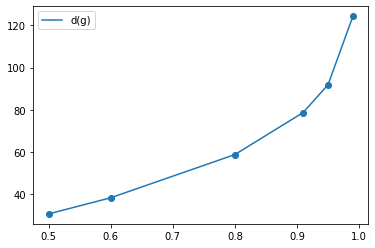

Сравнение доверительных интервалов при разных уровнях значениях с теоретическим МО и нет:


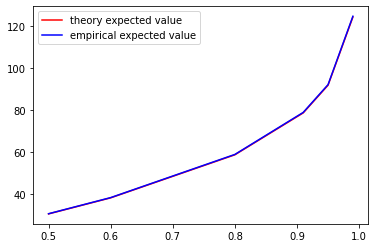

##################################################
##################################################
Точечная оценка МО при выборке из 100 элементов - 10.726988717157997.
Точечная несмещенноая оценка дисперсии при выборке из 100 элементов - 112.5406825282849.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): 80.97222 <= D <= 169.2084
Интервал при уровне значимости 0.95 (alpha=0.05): 87.6335 <= D <= 153.40652
Интервал при уровне значимости 0.91 (alpha=0.09): 90.72251 <= D <= 147.21418
Интервал при уровне значимости 0.8 (alpha=0.2): 95.85527 <= D <= 138.17276
Интервал при уровне значимости 0.6 (alpha=0.4): 101.74839 <= D <= 129.34936
Интервал при уровне значимости 0.5 (alpha=0.5): 104.11443 <= D <= 126.19326
График зависимости длинны интервала от уровня значимости.


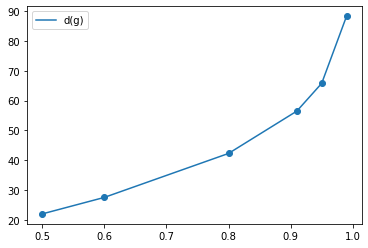

Доверительные интервалы при разных уровнях значимости (при теоретическом МО)
113.03583342924507
Интервал при уровне значимости 0.99 (alpha=0.01): 81.32848 <= D <= 169.95287
Интервал при уровне значимости 0.95 (alpha=0.05): 88.01906 <= D <= 154.08147
Интервал при уровне значимости 0.91 (alpha=0.09): 91.12166 <= D <= 147.86189
Интервал при уровне значимости 0.8 (alpha=0.2): 96.27701 <= D <= 138.78069
Интервал при уровне значимости 0.6 (alpha=0.4): 102.19605 <= D <= 129.91846
Интервал при уровне значимости 0.5 (alpha=0.5): 104.57251 <= D <= 126.74848
График зависимости длинны интервала от уровня значимости (при теоретичеком МО)


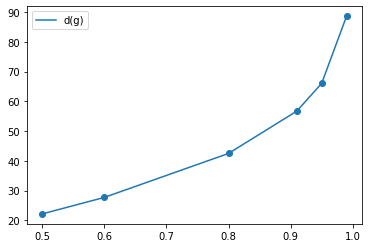

Сравнение доверительных интервалов при разных уровнях значениях с теоретическим МО и нет:


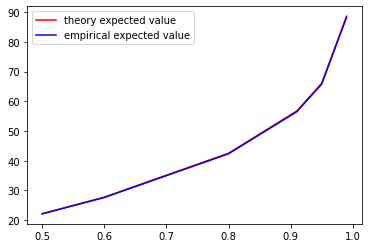

##################################################
##################################################
Точечная оценка МО при выборке из 150 элементов - 12.592206104807453.
Точечная несмещенноая оценка дисперсии при выборке из 150 элементов - 113.43370555513569.
Доверительные интервалы при разных уровнях значимости:

Интервал при уровне значимости 0.99 (alpha=0.01): 86.27835 <= D <= 157.12317
Интервал при уровне значимости 0.95 (alpha=0.05): 92.12917 <= D <= 145.30614
Интервал при уровне значимости 0.91 (alpha=0.09): 94.80685 <= D <= 140.58952
Интервал при уровне значимости 0.8 (alpha=0.2): 99.20913 <= D <= 133.60933
Интервал при уровне значимости 0.6 (alpha=0.4): 104.19482 <= D <= 126.68369
Интервал при уровне значимости 0.5 (alpha=0.5): 106.17681 <= D <= 124.17758
График зависимости длинны интервала от уровня значимости.


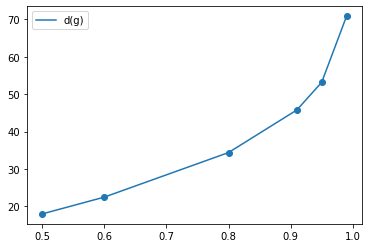

Доверительные интервалы при разных уровнях значимости (при теоретическом МО)
113.028188922006
Интервал при уровне значимости 0.99 (alpha=0.01): 85.96991 <= D <= 156.56147
Интервал при уровне значимости 0.95 (alpha=0.05): 91.79982 <= D <= 144.78668
Интервал при уровне значимости 0.91 (alpha=0.09): 94.46792 <= D <= 140.08693
Интервал при уровне значимости 0.8 (alpha=0.2): 98.85447 <= D <= 133.13168
Интервал при уровне значимости 0.6 (alpha=0.4): 103.82233 <= D <= 126.23081
Интервал при уровне значимости 0.5 (alpha=0.5): 105.79723 <= D <= 123.73366
График зависимости длинны интервала от уровня значимости (при теоретичеком МО)


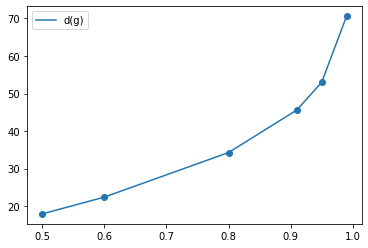

Сравнение доверительных интервалов при разных уровнях значениях с теоретическим МО и нет:


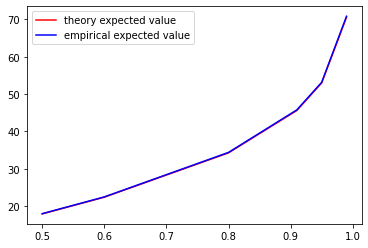

##################################################


In [77]:
disp_int(30)
disp_int(50)
disp_int(70)
disp_int(100)
disp_int(150)

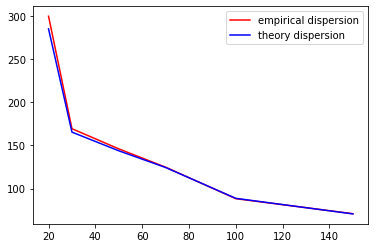

In [78]:
# make_lines(vars_ams, intervls, "d(n), when gamma=0.99")
comp(vars_ams, intervls, t_intervls, "empirical dispersion", "theory dispersion")